In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import pandas as pd
from collections import Counter

In [3]:
#Ex = [Save mods in order; Str, Dex, Con, Int, Wis, Cha]

#Vash gets +6 from proficiency in STR,CON; +1 in each from having a cord of Corilya, and +20 to Cha
#for having Onsinta
VashBash = [["Vash Bash"],[4+1+6,4+1,2+1+6,-2+1,-3+1,4+20+1]]
VashBash_a = [2,2]

#Eres has a +6 to Con, Cha; +1 to all for having a cord of Corilya
Eres = [["Eres"],[0+1,3+1,0+1+6,5+1,5+1,5+1+6]]
Eres_a = [0,0]

#Nithos has +5 proficiecy to Wis, Cha
Nithos = [["Nithos"],[3,3,3,-1,3+5,5+5]]
Nithos_a = [2,0]

#Uygun has +6 proficiency to Int and Wis
Uygun = [["Uygun"],[10,-1,10,1+6,10+6,10]]
Uygun_a = [0,2]

#Selor has +6 proficiency to Con and Cha
Selor = [["Selor"],[0,3,3+6,5,6,5+6]]
Selor_a = [0,0]

Swifty = [["Swifty"],[0, 9, 3, 4, 8, 12]]
Swifty_a = [0,1]

Willow = [["Willow"],[12, 5, 9, -2, 8, 4]]
Willow_a = [0,0]

Erdrick = [["Erdrick"],[-1, 5, 9, 14, 0, -3]]
Erdrick_a = [0, 2]

#Random lvl 1 smithy has +2 PROF to Str and Int
Smith1 = [["Blacksmith lvl 1"],[0+2,-1,0,1+2,1,1]]
Smith1_a = [0,0]

Starfall = [["Starfall"],[2+7,2+7,2+7,0+7,3+7+5,7+7+5]]
Starfall_a = [0,2]

Rogue6 = [["Rogue6"],[-1,5,-1,4,1,3]]
Rogue6_a = [1,2]

Paladin5 = [["Paladin5"],[3,0,2,-1,0,4]]
Paladin5_a = [0,0]

#NPC 18th lvl spellcaster
#gets advantage
#Possibly analogous to the most powerful students of Eres
ArchmageDMG = [["Archmage DMG"],[0,2,1,9,2,3]]

#+2 PROF in Wisdom and Charisma
CultFanaticDMG = [["Cult Fanatic DMG"],[0,2,1,0,1+2,2+2]]

#9th level caster, +3 PROF to INT and WIS (already accounted for)
#Used for Waith Esis
MageDMG = [["Mage DMG"],[-1,+2,0,6,4,0]]

#analogous to Onear and Annonear
MerrorDMG = [["Merrow DMG"],[4,0,2,-1,0,-1]]

In [4]:
def evanesce(persona,align_OG,advantage):
    align = copy.deepcopy(align_OG)
    DC = [10,12,14,16,18,20,22,24,26,28]
    stat_list = ["Str","Dex","Con","Int","Wis","Cha"]
    align_m = ["Good","Neutral","Evil"]
    align_e = ["Lawful","Neutral","Chaotic"]
    
    print("Persona: ", persona[0])
    print("Original alignment: ",align_e[align[1]],align_m[align[0]])
    
    #Choose how many saves they'll have to make:
    numsaves = random.randint(1,10)
    failcount = 0
    align_shift = [0,0]
    align_prog = copy.deepcopy(align)
    
    print("\nNumber of saves: ",numsaves)
    
    #start evanescence
    for counter in range(0,numsaves):
        print("\nSave number: ",counter)
        print("Save DC: ",DC[counter])
        
        #Choose the stat to use:
        stat = random.randint(0,5)
        print("Stat: ",stat_list[stat])
        
        #roll the save using that stat
        if advantage == 1:
            roll = max(random.randint(1,20),random.randint(1,20))+persona[1][stat]
        else:
            roll = random.randint(1,20)+persona[1][stat]
        
        
        print("Modifier: ",persona[1][stat])
        print("Roll: ",roll)
        
        
        #Does the stat succeed?
        if roll < DC[counter]:
            print("Failed save.")
            #yikes. Failed save; alignment change time!
            #This can be done with binary modulated counters!
            shift_morals = random.randint(0,1)
            if shift_morals == 0:
                shift_morals = -1
            shift_ethics = random.randint(0,1)
            if shift_ethics == 0:
                shift_ethics = -1
            align_shift[0] = align_shift[0]+shift_morals
            align_shift[1] = align_shift[1]+shift_ethics

            failcount = failcount+1
            
            align_prog[0] = (align_prog[0]+align_shift[0])%3
            align_prog[1] = (align_prog[1]+align_shift[1])%3
            
            print("Current alignment total shift: ",align_shift)
            print("Current alignment progress: ",align_e[align_prog[1]],align_m[align_prog[0]])
            print("Current fail count: ",failcount)
            align_prog = copy.deepcopy(align)
        else:
            print("Success!")
    
    align[0] = (align[0]+align_shift[0])%3
    align[1] = (align[1]+align_shift[1])%3
    
    print("\nFinal failcount: ",failcount)
    if failcount > 5:
        print("NOW SHADOW GOBLIN")
    else:
        print("SURVIVED!")
    print("Final alignment: ",align_e[align[1]],align_m[align[0]])

In [5]:
def evanesce_stats(persona,align_OG,advantage):
    align = copy.deepcopy(align_OG)
    #DC = [10,12,14,16,18,20,22,24,26,28]
    DC = [12,14,16,18,20,22,24,26,28,30]
    stat_list = ["Str","Dex","Con","Int","Wis","Cha"]
    align_m = ["Good","Neutral","Evil"]
    align_e = ["Lawful","Neutral","Chaotic"]
    
#     print("Persona: ", persona[0])
#     print("Original alignment: ",align_e[align[1]],align_m[align[0]])
    
    #Choose how many saves they'll have to make:
#    numsaves = random.randint(1,10)
    numsaves = random.randint(1,6)+4
    failcount = 0
    align_shift = [0,0]
    align_prog = copy.deepcopy(align)
    
#    print("\nNumber of saves: ",numsaves)
    
    #start evanescence
    for counter in range(0,numsaves):
#         print("\nSave number: ",counter)
#         print("Save DC: ",DC[counter])
        
        #Choose the stat to use:
        stat = random.randint(0,5)
#        print("Stat: ",stat_list[stat])
        
        #roll the save using that stat
        if advantage == 1:
            roll = max(random.randint(1,20),random.randint(1,20))+persona[1][stat]
        else:
            roll = random.randint(1,20)+persona[1][stat]
            
#         print("Modifier: ",persona[1][stat])
#         print("Roll: ",roll)
        
        
        #Does the stat succeed?
        if roll < DC[counter]:
#            print("Failed save.")
            #yikes. Failed save; alignment change time!
            #This can be done with binary modulated counters!
            shift_morals = random.randint(0,1)
            if shift_morals == 0:
                shift_morals = -1
            shift_ethics = random.randint(0,1)
            if shift_ethics == 0:
                shift_ethics = -1
            align_shift[0] = align_shift[0]+shift_morals
            align_shift[1] = align_shift[1]+shift_ethics

            failcount = failcount+1
            
            align_prog[0] = (align_prog[0]+align_shift[0])%3
            align_prog[1] = (align_prog[1]+align_shift[1])%3
            
#             print("Current alignment total shift: ",align_shift)
#             print("Current alignment progress: ",align_e[align_prog[1]],align_m[align_prog[0]])
#             print("Current fail count: ",failcount)
            align_prog = copy.deepcopy(align)
#        else:
#            print("Success!")
    
    align[0] = (align[0]+align_shift[0])%3
    align[1] = (align[1]+align_shift[1])%3
    
#    print("\nFinal failcount: ",failcount)
    if failcount > 5:
#        print("NOW SHADOW GOBLIN")
        return [0,align]
    else:
        return [1,align]
#        print("SURVIVED!")
#    print("Final alignment: ",align_e[align[1]],align_m[align[0]])

In [6]:
def evanesce_stats_AmonSen(persona,align_OG,advantage):
    align = copy.deepcopy(align_OG)
    #DC = [10,12,14,16,18,20,22,24,26,28]
    DC = [12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
    stat_list = ["Str","Dex","Con","Int","Wis","Cha"]
    align_m = ["Good","Neutral","Evil"]
    align_e = ["Lawful","Neutral","Chaotic"]
    
#     print("Persona: ", persona[0])
#     print("Original alignment: ",align_e[align[1]],align_m[align[0]])
    
    #Choose how many saves they'll have to make:
#    numsaves = random.randint(1,10)
    numsaves = random.randint(1,6)+9
    failcount = 0
    align_shift = [0,0]
    align_prog = copy.deepcopy(align)
    
#    print("\nNumber of saves: ",numsaves)
    
    #start evanescence
    for counter in range(0,numsaves):
#         print("\nSave number: ",counter)
#         print("Save DC: ",DC[counter])
        
        #Choose the stat to use:
        stat = random.randint(0,5)
#        print("Stat: ",stat_list[stat])
        
        #roll the save using that stat
        if advantage == 1:
            roll = max(random.randint(1,20),random.randint(1,20))+persona[1][stat]
        else:
            roll = random.randint(1,20)+persona[1][stat]
#         print("Modifier: ",persona[1][stat])
#         print("Roll: ",roll)
        
        
        #Does the stat succeed?
        if roll < DC[counter]:
#            print("Failed save.")
            #yikes. Failed save; alignment change time!
            #This can be done with binary modulated counters!
            shift_morals = random.randint(0,1)
            if shift_morals == 0:
                shift_morals = -1
            shift_ethics = random.randint(0,1)
            if shift_ethics == 0:
                shift_ethics = -1
            align_shift[0] = align_shift[0]+shift_morals
            align_shift[1] = align_shift[1]+shift_ethics

            failcount = failcount+1
            
            align_prog[0] = (align_prog[0]+align_shift[0])%3
            align_prog[1] = (align_prog[1]+align_shift[1])%3
            
#             print("Current alignment total shift: ",align_shift)
#             print("Current alignment progress: ",align_e[align_prog[1]],align_m[align_prog[0]])
#             print("Current fail count: ",failcount)
            align_prog = copy.deepcopy(align)
#        else:
#            print("Success!")
    
    align[0] = (align[0]+align_shift[0])%3
    align[1] = (align[1]+align_shift[1])%3
    
#    print("\nFinal failcount: ",failcount)
    if failcount > 5:
#        print("NOW SHADOW GOBLIN")
        return [0,numsaves]
        
    else:
        return [1,numsaves]
#        print("SURVIVED!")
#    print("Final alignment: ",align_e[align[1]],align_m[align[0]])

In [27]:
#Make a statistical histogram for alignment changes
def histo(persona,align):
    NUM = 5000
    store = []
    for i in range(0,NUM):
        survival, align_tuple = evanesce_stats(persona,align,0)
        if survival == 1:
            morals = align_tuple[0]
            ethics = align_tuple[1]
            concat = str(morals)+str(ethics)

        if survival == 1:
            store.append(concat)
    store.sort()
    counts = Counter(store)
    df = pd.DataFrame.from_dict(counts,orient='index')
    df.plot(kind='bar')
    plt.xlabel("Alignments")
    plt.ylabel("Count")
    plt.title("Alignment distribution for 5000: "+persona[0][0])

In [28]:
##AD ELOVII SURVIVAL CHANCE
def adeloviiSurvival(persona,align,advantage):
    survival_count = 0
    NUM = 5000
    for i in range(0,NUM):
        survival_count = survival_count + evanesce_stats(persona,align,0)[0]
    print("Survival percentage: ",survival_count/NUM)

In [29]:
##AMON SEN SURVIVAL CHANCE
def amonsenSurvival(persona,align,advantage):
    survival_count = 0
    NUM = 5000
    for i in range(0,NUM):
        survival_count = survival_count + evanesce_stats_AmonSen(Paladin5,VashBash_a,0)[0]
    print("Survival percentage for Amon Sen: ",survival_count/NUM)

Survival percentage:  0.692


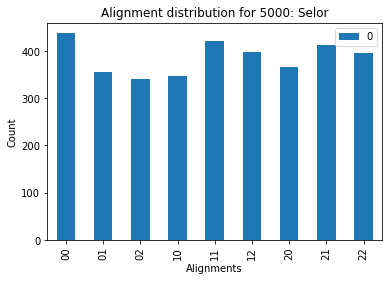

In [44]:
adeloviiSurvival(Selor,Selor_a,0)
histo(Selor,Selor_a)

In [9]:
evanesce(VashBash,VashBash_a,0)

Persona:  ['Vash Bash']
Original alignment:  Chaotic Evil

Number of saves:  6

Save number:  0
Save DC:  10
Stat:  Dex
Modifier:  5
Roll:  15
Success!

Save number:  1
Save DC:  12
Stat:  Dex
Modifier:  5
Roll:  17
Success!

Save number:  2
Save DC:  14
Stat:  Wis
Modifier:  -2
Roll:  9
Failed save.
Current alignment total shift:  [1, 1]
Current alignment progress:  Lawful Good
Current fail count:  1

Save number:  3
Save DC:  16
Stat:  Int
Modifier:  -1
Roll:  7
Failed save.
Current alignment total shift:  [2, 2]
Current alignment progress:  Neutral Neutral
Current fail count:  2

Save number:  4
Save DC:  18
Stat:  Wis
Modifier:  -2
Roll:  4
Failed save.
Current alignment total shift:  [1, 1]
Current alignment progress:  Lawful Good
Current fail count:  3

Save number:  5
Save DC:  20
Stat:  Con
Modifier:  9
Roll:  11
Failed save.
Current alignment total shift:  [2, 0]
Current alignment progress:  Chaotic Neutral
Current fail count:  4

Final failcount:  4
SURVIVED!
Final alignment:

In [217]:
evanesce(Nithos,Nithos_a,0)

Persona:  ['Nithos']
Original alignment:  Lawful Evil

Number of saves:  6

Save number:  0
Save DC:  10
Stat:  Dex
Modifier:  3
Roll:  12
Success!

Save number:  1
Save DC:  12
Stat:  Str
Modifier:  3
Roll:  21
Success!

Save number:  2
Save DC:  14
Stat:  Wis
Modifier:  8
Roll:  27
Success!

Save number:  3
Save DC:  16
Stat:  Int
Modifier:  -1
Roll:  13
Failed save.
Current alignment total shift:  [-1, -1]
Current alignment progress:  Chaotic Neutral
Current fail count:  1

Save number:  4
Save DC:  18
Stat:  Str
Modifier:  3
Roll:  20
Success!

Save number:  5
Save DC:  20
Stat:  Con
Modifier:  3
Roll:  6
Failed save.
Current alignment total shift:  [-2, 0]
Current alignment progress:  Lawful Good
Current fail count:  2

Final failcount:  2
SURVIVED!
Final alignment:  Lawful Good


In [219]:
evanesce(Eres,Eres_a,0)

Persona:  ['Eres']
Original alignment:  Lawful Good

Number of saves:  7

Save number:  0
Save DC:  10
Stat:  Wis
Modifier:  6
Roll:  18
Success!

Save number:  1
Save DC:  12
Stat:  Wis
Modifier:  6
Roll:  14
Success!

Save number:  2
Save DC:  14
Stat:  Str
Modifier:  1
Roll:  8
Failed save.
Current alignment total shift:  [-1, -1]
Current alignment progress:  Chaotic Evil
Current fail count:  1

Save number:  3
Save DC:  16
Stat:  Wis
Modifier:  6
Roll:  8
Failed save.
Current alignment total shift:  [-2, -2]
Current alignment progress:  Neutral Neutral
Current fail count:  2

Save number:  4
Save DC:  18
Stat:  Int
Modifier:  6
Roll:  26
Success!

Save number:  5
Save DC:  20
Stat:  Dex
Modifier:  4
Roll:  13
Failed save.
Current alignment total shift:  [-1, -3]
Current alignment progress:  Lawful Evil
Current fail count:  3

Save number:  6
Save DC:  22
Stat:  Cha
Modifier:  12
Roll:  24
Success!

Final failcount:  3
SURVIVED!
Final alignment:  Lawful Evil


In [220]:
evanesce(Uygun,Uygun_a,0)

Persona:  ['Uygun']
Original alignment:  Chaotic Good

Number of saves:  5

Save number:  0
Save DC:  10
Stat:  Con
Modifier:  10
Roll:  13
Success!

Save number:  1
Save DC:  12
Stat:  Wis
Modifier:  16
Roll:  27
Success!

Save number:  2
Save DC:  14
Stat:  Int
Modifier:  7
Roll:  9
Failed save.
Current alignment total shift:  [-1, 1]
Current alignment progress:  Lawful Evil
Current fail count:  1

Save number:  3
Save DC:  16
Stat:  Dex
Modifier:  -1
Roll:  16
Success!

Save number:  4
Save DC:  18
Stat:  Cha
Modifier:  10
Roll:  13
Failed save.
Current alignment total shift:  [-2, 0]
Current alignment progress:  Chaotic Neutral
Current fail count:  2

Final failcount:  2
SURVIVED!
Final alignment:  Chaotic Neutral


In [19]:
evanesce(Selor,Selor_a,0)

Persona:  ['Selor']
Original alignment:  Lawful Good

Number of saves:  8

Save number:  0
Save DC:  10
Stat:  Dex
Modifier:  3
Roll:  7
Failed save.
Current alignment total shift:  [1, -1]
Current alignment progress:  Chaotic Neutral
Current fail count:  1

Save number:  1
Save DC:  12
Stat:  Cha
Modifier:  11
Roll:  17
Success!

Save number:  2
Save DC:  14
Stat:  Cha
Modifier:  11
Roll:  20
Success!

Save number:  3
Save DC:  16
Stat:  Con
Modifier:  9
Roll:  18
Success!

Save number:  4
Save DC:  18
Stat:  Cha
Modifier:  11
Roll:  20
Success!

Save number:  5
Save DC:  20
Stat:  Con
Modifier:  9
Roll:  22
Success!

Save number:  6
Save DC:  22
Stat:  Dex
Modifier:  3
Roll:  4
Failed save.
Current alignment total shift:  [0, -2]
Current alignment progress:  Neutral Good
Current fail count:  2

Save number:  7
Save DC:  24
Stat:  Cha
Modifier:  11
Roll:  14
Failed save.
Current alignment total shift:  [1, -3]
Current alignment progress:  Lawful Neutral
Current fail count:  3

Final f